# Pedestrian Movement Prediction and Analysis Model

Project Title: Pedestrian Movement Prediction and Analysis Model

# Name: NIKHI PRATHISH

# Organization: Entri Elevate

# Overview of Problem Statement

Pedestrian tracking is essential for analyzing movement patterns and ensuring safety in public spaces. This project aims to track and analyze pedestrian movements using geospatial and time-series data. The end goal is to build a machine learning model that predicts pedestrian interactions based on movement data and surrounding objects.

# Objectives


* Analyze pedestrian movement patterns.

* Build a machine learning model to predict pedestrian movements.

* Visualize relationships among features to derive insights.



# Data Description

# Features:

* oid: Pedestrian ID.

* timestamp: Time of data capture.

* x, y: Coordinates of the pedestrian.

* body_roll, body_pitch, body_yaw: Body orientation metrics.

* head_roll, head_pitch, head_yaw: Head orientation metrics.

* other_oid, other_class, other_x, other_y: Information about nearby objects and their positions.

# Target Variable:

* other_class: Represents different types of pedestrian interactions. Categorical variable with multiple classes (crossing, waiting, walking), encoded numerically.

# Data Collection

The dataset is pre-collected and contains spatial, temporal, and orientation-related features.

# Libraries Used

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neighbors import KNeighborsClassifier
import joblib

* Step 1: Load Dataset

In [17]:
# Load the dataset
data = pd.read_csv('pedastrain _track .csv')


* Load the CSV dataset into a pandas DataFrame for analysis.

In [19]:
# Dataframe
df = pd.DataFrame(data)
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]","[4, 0, 3, 3, 1, 3]","[496244.54009617, 496227.152782719, 496217.565...","[5406055.86543169, 5406069.02898164, 5406073.3..."
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]","[3, 4, 1, 3, 3, 0]","[496213.205162677, 496244.63289458, 496208.076...","[5406066.94295635, 5406055.85444835, 5406071.5..."
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]","[0, 3, 1, 3, 4, 3]","[496227.152782719, 496206.206044983, 496208.70...","[5406069.02898164, 5406068.88933245, 5406071.2..."
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]","[1, 0, 3, 4, 3, 3]","[496209.35021584, 496227.152782719, 496217.590...","[5406070.75167456, 5406069.02898164, 5406073.4..."


* Step 2: Data Exploration




In [21]:
df.head(11)

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."
5,50187,1842.9,495855.4379,5405751.052,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.43789091, 495899.690271544, 495899.841...","[5405751.05247544, 5405738.97456228, 5405737.9..."
6,50187,1843.0,495855.6188,5405751.083,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50184, 50181, 50187]","[0, 4, 4, 4]","[495918.500605338, 495899.860346439, 495899.92...","[5405744.93294628, 5405738.96983389, 5405737.9..."
7,50187,1843.1,495855.7998,5405751.114,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50184, 50187, 47646]","[4, 4, 4, 0]","[495900.031944587, 495900.017717756, 495855.79...","[5405738.00513848, 5405738.97448397, 5405751.1..."
8,50187,1843.2,495855.9636,5405751.156,NaN,NaN,NaN,NaN,NaN,NaN,"[50184, 50187, 47646, 50181]","[4, 4, 0, 4]","[495900.200273264, 495855.963615237, 495916.90...","[5405738.96255163, 5405751.15608379, 5405745.1..."
9,50187,1843.3,495856.0874,5405751.198,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495916.09265434, 495900.333131012, 495900.340...","[5405745.21860418, 5405738.01123903, 5405738.9..."


In [22]:
df.tail(10)

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
4749,39406,693.7,496244.0041,5406055.969,NaN,NaN,NaN,NaN,NaN,NaN,"[39402, 39406, 39414, 39415, 39416, 38509]","[3, 4, 3, 1, 3, 0]","[496217.266882775, 496244.004092412, 496206.17...","[5406073.37753754, 5406055.96913526, 5406068.9..."
4750,39406,693.8,496244.1140,5406055.949,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39415, 39414, 39402, 38509, 39406]","[3, 1, 3, 3, 0, 4]","[496213.238920699, 496205.001271235, 496206.15...","[5406066.96406003, 5406072.52730278, 5406068.8..."
4751,39406,693.9,496244.2319,5406055.924,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 39416, 39414, 39402, 38509, 39415]","[4, 3, 3, 3, 0, 1]","[496244.231865539, 496213.239333836, 496206.15...","[5406055.92416393, 5406066.97277434, 5406068.8..."
4752,39406,694.0,496244.3418,5406055.909,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 39415, 39414, 39402, 38509, 39416]","[4, 1, 3, 3, 0, 3]","[496244.341754305, 496206.298918666, 496206.15...","[5406055.90865015, 5406072.09218581, 5406068.8..."
4753,39406,694.1,496244.4425,5406055.884,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 39402, 39414, 39415, 39416, 38509]","[4, 3, 3, 1, 3, 0]","[496244.442464822, 496217.449120526, 496206.16...","[5406055.88379743, 5406073.3846591, 5406068.88..."
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]","[4, 0, 3, 3, 1, 3]","[496244.54009617, 496227.152782719, 496217.565...","[5406055.86543169, 5406069.02898164, 5406073.3..."
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]","[3, 4, 1, 3, 3, 0]","[496213.205162677, 496244.63289458, 496208.076...","[5406066.94295635, 5406055.85444835, 5406071.5..."
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]","[0, 3, 1, 3, 4, 3]","[496227.152782719, 496206.206044983, 496208.70...","[5406069.02898164, 5406068.88933245, 5406071.2..."
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]","[1, 0, 3, 4, 3, 3]","[496209.35021584, 496227.152782719, 496217.590...","[5406070.75167456, 5406069.02898164, 5406073.4..."
4758,39406,694.6,496244.9373,5406055.838,NaN,NaN,NaN,NaN,NaN,NaN,"[39402, 39406, 39416, 39415, 39414, 38509]","[3, 4, 3, 1, 3, 0]","[496217.604900961, 496244.937343591, 496213.21...","[5406073.44410294, 5406055.838418, 5406066.963..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   oid          4759 non-null   int64  
 1   timestamp    4759 non-null   float64
 2   x            4759 non-null   float64
 3   y            4759 non-null   float64
 4   body_roll    2061 non-null   float64
 5   body_pitch   2061 non-null   float64
 6   body_yaw     2061 non-null   float64
 7   head_roll    2061 non-null   float64
 8   head_pitch   2061 non-null   float64
 9   head_yaw     2061 non-null   float64
 10  other_oid    4759 non-null   object 
 11  other_class  4759 non-null   object 
 12  other_x      4759 non-null   object 
 13  other_y      4759 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 520.6+ KB


Description:  To understand the structure of the dataset — check the first few rows and data types.

In [25]:
data.shape

(4759, 14)


# Data Cleaning

In [27]:
# Convert 'None' values to NaN for proper handling
df.replace('None', np.nan, inplace=True)

Description: Replace any 'None' values in the dataset with NaN to enable easier handling of missing data.

In [29]:
#Convert list columns to usable features (take first element as an example)
df['other_class'] = df['other_class'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)
df['other_x'] = df['other_x'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)
df['other_y'] = df['other_y'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)

Description: Some columns may contain data stored as lists in string format (e.g., '[1,2,3]'). This step extracts the first element from such lists to convert the data into a more usable format for analysis and model training.

In [31]:
# Check for duplicate rows
data.duplicated().sum()

0

Description: Count the number of duplicate rows in the dataset to identify and remove redundant data if necessary.

In [33]:
# Display data types
print(df.dtypes)

oid              int64
timestamp      float64
x              float64
y              float64
body_roll      float64
body_pitch     float64
body_yaw       float64
head_roll      float64
head_pitch     float64
head_yaw       float64
other_oid       object
other_class      int64
other_x        float64
other_y        float64
dtype: object


In [34]:
print(df.columns)

Index(['oid', 'timestamp', 'x', 'y', 'body_roll', 'body_pitch', 'body_yaw',
       'head_roll', 'head_pitch', 'head_yaw', 'other_oid', 'other_class',
       'other_x', 'other_y'],
      dtype='object')


Description: Display the data types of each column to ensure they are correctly formatted for analysis, and list all column names to confirm the structure of the dataset.

# Data Inspection and Transformation




In [37]:
# # Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

Description: Ensure column names are clean and free of extra spaces that might interfere with further processing.

In [39]:
# Identify columns with non-numeric data
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric data.")
        print(df[col].head())

Column 'other_oid' contains non-numeric data.
0    [47646, 50181, 50184, 50187]
1    [50181, 50187, 50184, 47646]
2    [47646, 50187, 50184, 50181]
3    [50187, 47646, 50184, 50181]
4    [50187, 50184, 50181, 47646]
Name: other_oid, dtype: object


Description: Identify columns containing categorical or text data for potential preprocessing.

In [41]:
# Identify columns containing lists
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains lists.")

Description: Detect columns that still contain list-like structures for further handling.

In [43]:
# Define a function to convert string representations of lists to actual lists
import ast

def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x

# Apply the conversion to all DataFrame cells
df = df.applymap(convert_to_list)

Description: Convert string-based lists into actual Python list objects, preserving data structure integrity.

In [45]:

df['list_length'] = df['other_oid'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
df['first_value'] = df['other_oid'].apply(lambda x: x[0] if isinstance(x, list) else np.nan)
df['mean_value'] = df['other_oid'].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)


Description: list_length: Calculates the length of each list in the other_oid column. If the value is not a list, it returns NaN. This helps capture how many nearby objects were detected.

first_value: Extracts the first element from the list in other_oid. If the value is not a list, it returns NaN. This is useful when the first object is the closest or most significant.

mean_value: Computes the average value of the list in other_oid. If the value is not a list, it returns NaN. This can provide an aggregate sense of nearby object positions or IDs.

In [47]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y,list_length,first_value,mean_value
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]",0,495923.373133,5.405744e+06,4,47646,49549.500000
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]",4,495899.234567,5.405738e+06,4,50181,49549.500000
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]",0,495921.779445,5.405745e+06,4,47646,49549.500000
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]",4,495855.095616,5.405751e+06,4,50187,49549.500000
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]",4,495855.256935,5.405751e+06,4,50187,49549.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]",4,496244.540096,5.406056e+06,6,39406,39260.333333
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]",3,496213.205163,5.406067e+06,6,39416,39260.333333
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]",0,496227.152783,5.406069e+06,6,38509,39260.333333
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]",1,496209.350216,5.406071e+06,6,39415,39260.333333


In [48]:
def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x  # Leave as is if conversion fails

# Apply only to object (string-based) columns
df = df.apply(lambda col: col.map(convert_to_list) if col.dtype == "object" else col)


Description:

convert_to_list(): This function attempts to convert strings that look like Python lists  into actual list objects using ast.literal_eval(). If the conversion fails — due to bad formatting or other issues — it safely returns the original value.
df.apply(): This line ensures the conversion happens only on columns with an "object" data type (i.e., strings). It skips numeric or already properly formatted columns to avoid errors.

In [50]:
column_name = "other_oid"  # Replace with the correct column name

df['list_length'] = df[column_name].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
df['first_value'] = df[column_name].apply(lambda x: x[0] if isinstance(x, list) else np.nan)
df['mean_value'] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)


Description:
This section extracts valuable insights from columns containing lists.i.e, a pedestrian may have multiple nearby objects (other_oid) logged as a list. Here’s what each new feature does:

list_length: Counts how many items are in the list. If the entry isn’t a list, it returns NaN.
first_value: Captures the first item in the list (e.g., the first detected object). Returns NaN if the entry isn’t a list.
mean_value: Calculates the average of numeric values in the list (e.g., averaging multiple object distances). If the data isn’t numeric or a list, it returns NaN.

In [52]:
print(df[column_name].apply(type).value_counts())


other_oid
<class 'list'>    4759
Name: count, dtype: int64


In [53]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y,list_length,first_value,mean_value
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]",0,495923.373133,5.405744e+06,4,47646,49549.500000
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]",4,495899.234567,5.405738e+06,4,50181,49549.500000
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]",0,495921.779445,5.405745e+06,4,47646,49549.500000
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]",4,495855.095616,5.405751e+06,4,50187,49549.500000
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]",4,495855.256935,5.405751e+06,4,50187,49549.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]",4,496244.540096,5.406056e+06,6,39406,39260.333333
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]",3,496213.205163,5.406067e+06,6,39416,39260.333333
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]",0,496227.152783,5.406069e+06,6,38509,39260.333333
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]",1,496209.350216,5.406071e+06,6,39415,39260.333333


In [54]:
column_name = "other_oid"  # Replace with actual column name
print(df[column_name].apply(type).value_counts())

other_oid
<class 'list'>    4759
Name: count, dtype: int64


In [55]:
def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x  # Return as-is if conversion fails

df[column_name] = df[column_name].apply(convert_to_list)


In [56]:
df[column_name] = df[column_name].apply(lambda x: list(itertools.chain(*x)) if isinstance(x, list) and any(isinstance(i, list) for i in x) else x)


In [57]:
df['list_length'] = df[column_name].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
df['first_value'] = df[column_name].apply(lambda x: x[0] if isinstance(x, list) else np.nan)
df['mean_value'] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

In [58]:
print(df[[column_name, 'list_length', 'first_value', 'mean_value']].head())

                      other_oid  list_length  first_value  mean_value
0  [47646, 50181, 50184, 50187]            4        47646     49549.5
1  [50181, 50187, 50184, 47646]            4        50181     49549.5
2  [47646, 50187, 50184, 50181]            4        47646     49549.5
3  [50187, 47646, 50184, 50181]            4        50187     49549.5
4  [50187, 50184, 50181, 47646]            4        50187     49549.5


In [59]:
df["other_oid"] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

In [60]:
print(df.columns)

Index(['oid', 'timestamp', 'x', 'y', 'body_roll', 'body_pitch', 'body_yaw',
       'head_roll', 'head_pitch', 'head_yaw', 'other_oid', 'other_class',
       'other_x', 'other_y', 'list_length', 'first_value', 'mean_value'],
      dtype='object')


In [61]:
print(df[column_name].apply(type).value_counts())


other_oid
<class 'float'>    4759
Name: count, dtype: int64


In [62]:
# Convert string representations of lists into actual lists
df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a new column with the mean of lists
df["other_oid"] = df[column_name].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

# Check the first few rows
print(df.head())


     oid  timestamp            x            y  body_roll  body_pitch  \
0  50187     1842.4  495854.6403  5405750.912        NaN         NaN   
1  50187     1842.5  495854.7921  5405750.939        NaN         NaN   
2  50187     1842.6  495854.9438  5405750.966        NaN         NaN   
3  50187     1842.7  495855.0956  5405750.993        NaN         NaN   
4  50187     1842.8  495855.2569  5405751.022        NaN         NaN   

   body_yaw  head_roll  head_pitch  head_yaw  other_oid  other_class  \
0       NaN        NaN         NaN       NaN    49549.5            0   
1       NaN        NaN         NaN       NaN    49549.5            4   
2       NaN        NaN         NaN       NaN    49549.5            0   
3       NaN        NaN         NaN       NaN    49549.5            4   
4       NaN        NaN         NaN       NaN    49549.5            4   

         other_x       other_y  list_length  first_value  mean_value  
0  495923.373133  5.405744e+06            4        47646     49

In [63]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [64]:
# Display summary statistics
print(df.describe())

                oid    timestamp              x             y    body_roll  \
count   4759.000000  4759.000000    4759.000000  4.759000e+03  4759.000000   
mean   36158.947258  1169.678924  496070.834761  5.405964e+06     0.131661   
std    15992.323879   800.496866     109.830019  1.763856e+02     0.909294   
min     7682.000000   217.500000  495813.501700  5.405731e+06    -7.000000   
25%    19348.000000   317.500000  496008.570300  5.405741e+06     0.000000   
50%    42054.000000   925.400000  496062.816700  5.406074e+06     0.000000   
75%    49654.000000  1837.850000  496157.493300  5.406116e+06     0.000000   
max    50943.000000  2650.800000  496331.271300  5.406147e+06    10.800000   

        body_pitch    body_yaw    head_roll   head_pitch     head_yaw  \
count  4759.000000  4759.00000  4759.000000  4759.000000  4759.000000   
mean     -0.308270   191.37642    -0.109919    -0.470370   185.982897   
std       1.530334    52.97281     2.315212     3.762937    51.216930   
min  

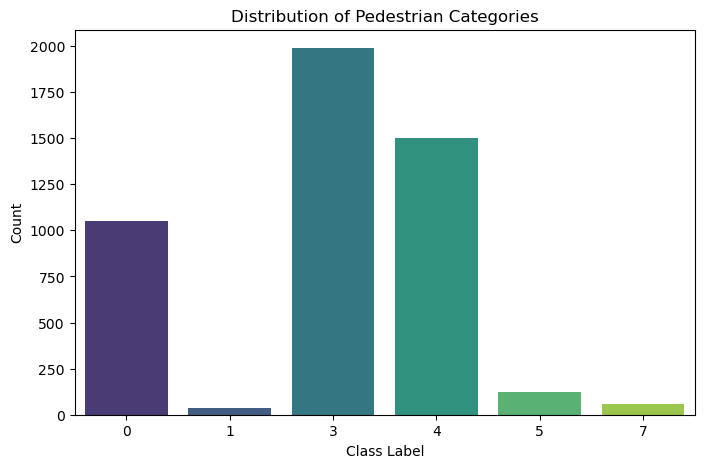

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['other_class'], palette="viridis")
plt.title("Distribution of Pedestrian Categories")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

Description;
Bar chart:
Each bar represents a category (crossing, waiting, walking, etc.).
The height of each bar shows how many times that category appears in the dataset.

# Time-series line plot

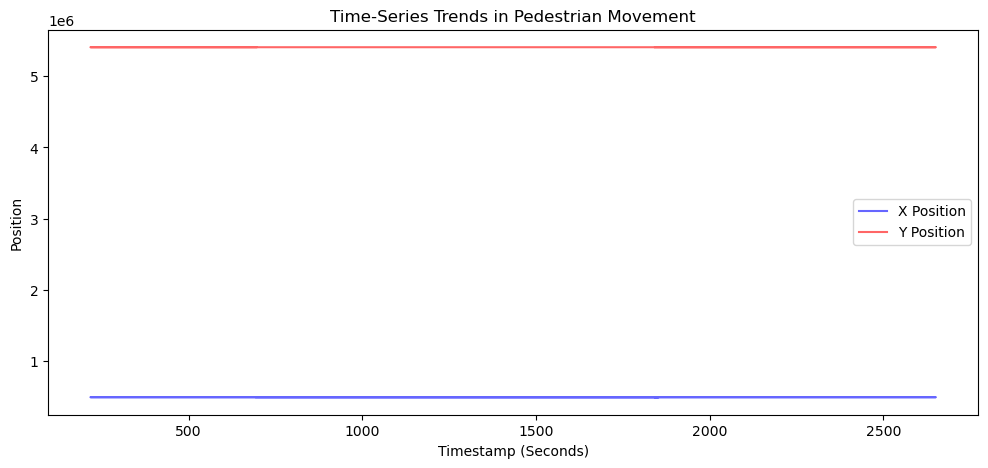

In [68]:
plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['x'], label='X Position', color='blue', alpha=0.6)
plt.plot(df['timestamp'], df['y'], label='Y Position', color='red', alpha=0.6)
plt.xlabel("Timestamp (Seconds)")
plt.ylabel("Position")
plt.title("Time-Series Trends in Pedestrian Movement")
plt.legend()
plt.show()

 Description;
time-series line plot to visualize pedestrian movement over time.
X-axis: Time progression (timestamp).
Y-axis: Pedestrian position in x and y directions.
Blue line: Represents horizontal movement (x).
Red line: Represents vertical movement (y).

# 2D Kernel Density Estimation (KDE) plot 

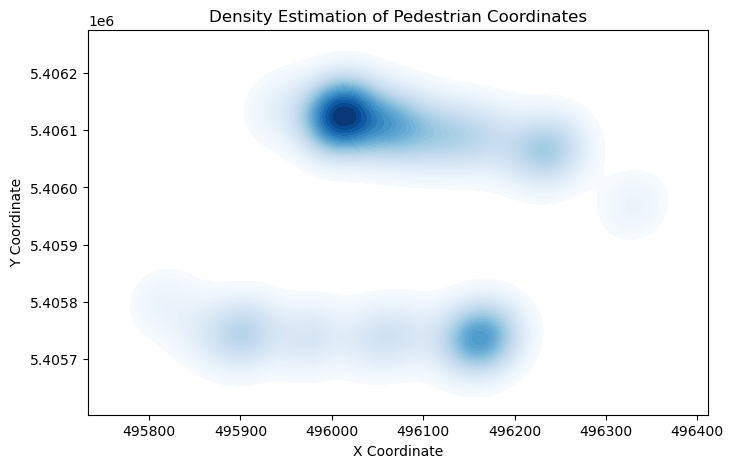

In [71]:
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['x'], y=df['y'], cmap="Blues", fill=True, levels=50)
plt.title("Density Estimation of Pedestrian Coordinates")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


Description; 

2D Kernel Density Estimation (KDE) plot to visualize where pedestrians' coordinates are most concentrated.
Darker blue areas: Regions where pedestrian coordinates are highly concentrated.
Lighter blue areas: Regions with fewer pedestrians.
X and Y axes: Physical coordinates of pedestrian positions.

# Correlation Heatmap

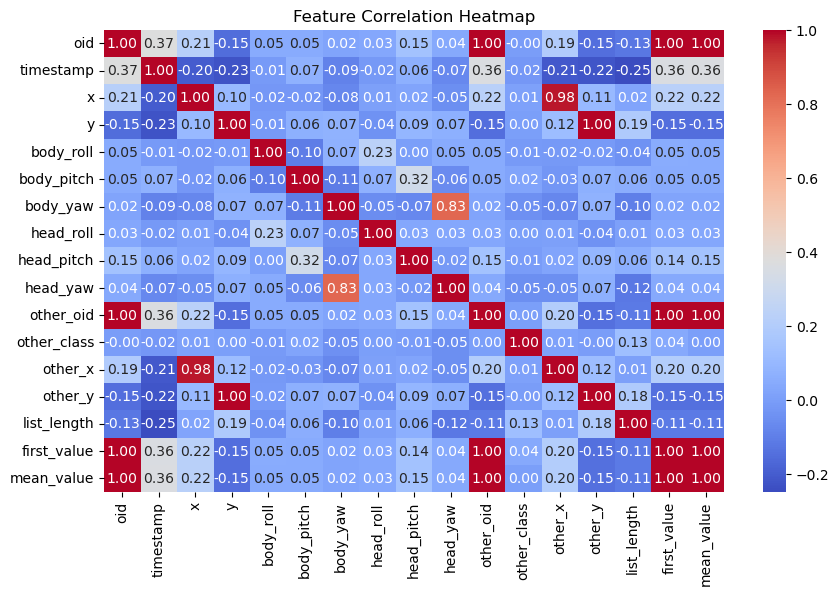

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Correlation Heatmap — a powerful tool for understanding
The heatmap tells you:
Correlation values:

+1: Perfect positive correlation (e.g., two features increase together).
-1: Perfect negative correlation (e.g., one feature increases, the other decreases).
0: No correlation (the features are unrelated).
Red cells: Strong positive correlation.

Blue cells: Strong negative correlation.

Near-white cells: Weak or no correlation.

# Boxplot Visualization

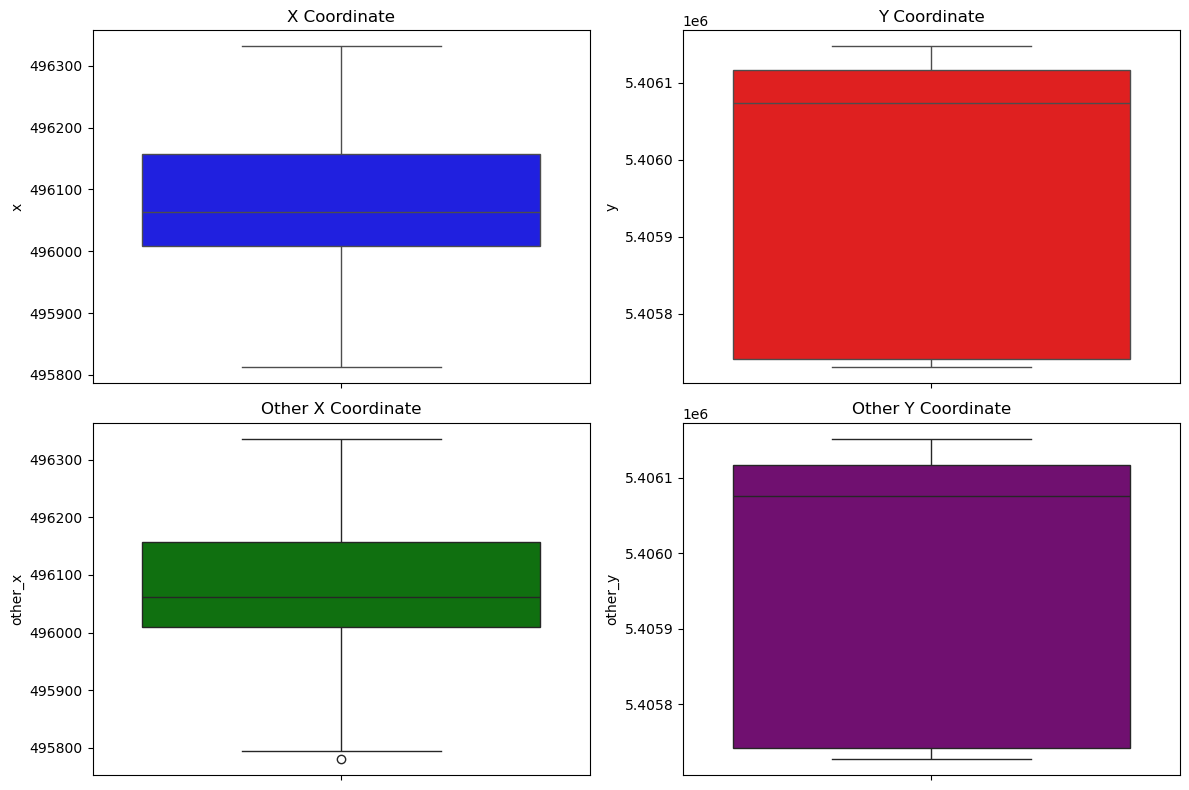

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(y=df['x'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title("X Coordinate")

sns.boxplot(y=df['y'], ax=axes[0, 1], color='red')
axes[0, 1].set_title("Y Coordinate")

sns.boxplot(y=df['other_x'], ax=axes[1, 0], color='green')
axes[1, 0].set_title("Other X Coordinate")

sns.boxplot(y=df['other_y'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Other Y Coordinate")

plt.tight_layout()
plt.show()

DEscription 
4-in-1 Boxplot Visualization — a quick, powerful way to inspect the distribution and potential outliers in the positional data.
 the Boxplots Reveal:
Box (Interquartile Range, IQR): Middle 50% of the data (Q1 to Q3).
Line inside box (Median): Shows the median value.
Whiskers: Extend to 1.5 times the IQR, covering most of the data.
Dots beyond whiskers (Outliers): Points that deviate significantly from the rest of the data.

In [79]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y,list_length,first_value,mean_value
0,50187,1842.4,495854.6403,5405750.912,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,0,495923.373133,5.405744e+06,4,47646,49549.500000
1,50187,1842.5,495854.7921,5405750.939,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,4,495899.234567,5.405738e+06,4,50181,49549.500000
2,50187,1842.6,495854.9438,5405750.966,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,0,495921.779445,5.405745e+06,4,47646,49549.500000
3,50187,1842.7,495855.0956,5405750.993,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,4,495855.095616,5.405751e+06,4,50187,49549.500000
4,50187,1842.8,495855.2569,5405751.022,0.0,0.0,192.0,0.0,0.0,185.687,49549.500000,4,495855.256935,5.405751e+06,4,50187,49549.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,4,496244.540096,5.406056e+06,6,39406,39260.333333
4755,39406,694.3,496244.6329,5406055.854,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,3,496213.205163,5.406067e+06,6,39416,39260.333333
4756,39406,694.4,496244.7329,5406055.847,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,0,496227.152783,5.406069e+06,6,38509,39260.333333
4757,39406,694.5,496244.8396,5406055.840,0.0,0.0,192.0,0.0,0.0,185.687,39260.333333,1,496209.350216,5.406071e+06,6,39415,39260.333333


In [80]:
df.shape

(4759, 17)

In [81]:
# Encode 'other_class' (Target variable)
le = LabelEncoder()
df['other_class'] = le.fit_transform(df['other_class'])  # Converts classes into numerical values

df.shape

(4759, 17)

This indicates :The target variable other_class into numeric values — a crucial step for preparing categorical data for machine learning models.

In [83]:
# Calculate speed as the Euclidean distance moved per timestamp
df['speed'] = ((df['x'].diff())**2 + (df['y'].diff())**2)**0.5

# Calculate acceleration as the difference in speed
df['acceleration'] = df['speed'].diff()

# Calculate relative position compared to the nearest object (first 'other_x' and 'other_y' value)
df['relative_x'] = df['x'] - df['other_x']
df['relative_y'] = df['y'] - df['other_y']

# Fill NaN values caused by differencing
df.fillna(0, inplace=True)


This transformation enriches the dataset by creating motion-based features — crucial for understanding pedestrian behavior and training predictive models.

In [85]:
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,...,other_class,other_x,other_y,list_length,first_value,mean_value,speed,acceleration,relative_x,relative_y
0,50187,1842.4,495854.6403,5405750.912,0.0,0.0,192.0,0.0,0.0,185.687,...,0,495923.373133,5.405744e+06,4,47646,49549.500000,0.000000,0.000000,-68.732833,6.590632
1,50187,1842.5,495854.7921,5405750.939,0.0,0.0,192.0,0.0,0.0,185.687,...,3,495899.234567,5.405738e+06,4,50181,49549.500000,0.154182,0.000000,-44.442467,12.547736
2,50187,1842.6,495854.9438,5405750.966,0.0,0.0,192.0,0.0,0.0,185.687,...,0,495921.779445,5.405745e+06,4,47646,49549.500000,0.154084,-0.000098,-66.835645,6.446703
3,50187,1842.7,495855.0956,5405750.993,0.0,0.0,192.0,0.0,0.0,185.687,...,3,495855.095616,5.405751e+06,4,50187,49549.500000,0.154182,0.000098,-0.000016,-0.000228
4,50187,1842.8,495855.2569,5405751.022,0.0,0.0,192.0,0.0,0.0,185.687,...,3,495855.256935,5.405751e+06,4,50187,49549.500000,0.163886,0.009704,-0.000035,0.000498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,0.0,0.0,192.0,0.0,0.0,185.687,...,3,496244.540096,5.406056e+06,6,39406,39260.333333,0.099432,-0.004325,0.000004,-0.000432
4755,39406,694.3,496244.6329,5406055.854,0.0,0.0,192.0,0.0,0.0,185.687,...,2,496213.205163,5.406067e+06,6,39416,39260.333333,0.093450,-0.005983,31.427737,-11.088956
4756,39406,694.4,496244.7329,5406055.847,0.0,0.0,192.0,0.0,0.0,185.687,...,0,496227.152783,5.406069e+06,6,38509,39260.333333,0.100245,0.006795,17.580117,-13.181982
4757,39406,694.5,496244.8396,5406055.840,0.0,0.0,192.0,0.0,0.0,185.687,...,1,496209.350216,5.406071e+06,6,39415,39260.333333,0.106929,0.006685,35.489384,-14.911675


In [86]:
df.shape

(4759, 21)

# Feature Scaling

In [88]:
# Define features and target variable
X = df[['timestamp', 'x', 'y', 'speed', 'acceleration', 'relative_x', 'relative_y',
        'body_roll', 'body_pitch', 'body_yaw', 'head_roll', 'head_pitch', 'head_yaw',
        'other_x', 'other_y']]
y = df['other_class']


Key Takeaways:
X = Features → What the model "learns from."
y = Target → What the model tries to predict.
This setup is perfect for classification tasks , predicting pedestrian behavior.

In [90]:
# Fit a Random Forest model to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

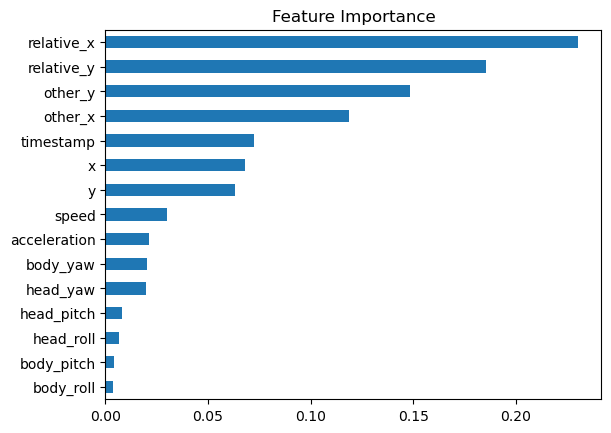

In [91]:
# Feature importance visualization
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()


In [92]:
# Select the top 10 most relevant features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Show selected feature indices
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['timestamp', 'x', 'y', 'relative_x', 'relative_y', 'body_yaw',
       'head_pitch', 'head_yaw', 'other_x', 'other_y'],
      dtype='object')


Takeaways;
Reduces dimensionality — Less noise, faster training, and less overfitting.
Keeps only powerful predictors — Focus on what really drives the classification.
Prepares for model tuning — Helps refine your model pipeline with a smaller, smarter feature set.

In [94]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)


* Why this is important:
Prevents overfitting — The test set simulates unseen data, giving an honest evaluation.
Stratification — Ensures minority classes are not underrepresented in training or testing.
Reproducibility — Consistent results for debugging and comparing models.


In [96]:
# Display the split dataset shapes
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (3807, 10)
Testing Features Shape: (952, 10)
Training Labels Shape: (3807,)
Testing Labels Shape: (952,)


In [97]:
#Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

 # Model Comparison and Evaluation

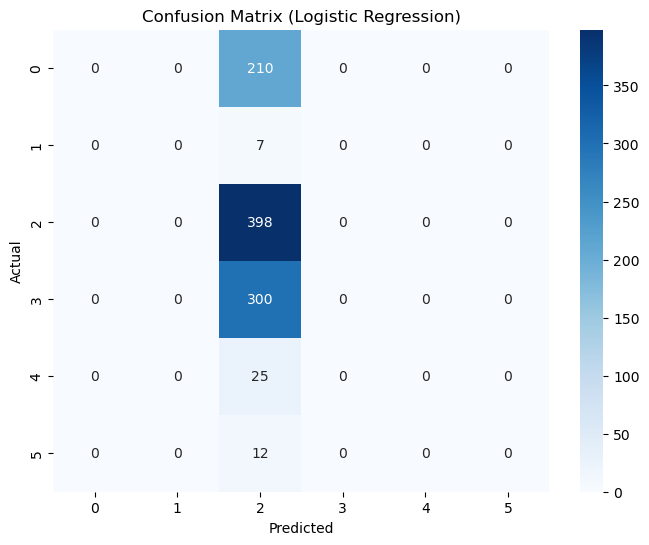

Results for Logistic Regression:
Accuracy: 0.4180672268907563
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       210
           1       0.00      0.00      0.00         7
           2       0.42      1.00      0.59       398
           3       0.00      0.00      0.00       300
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12

    accuracy                           0.42       952
   macro avg       0.07      0.17      0.10       952
weighted avg       0.17      0.42      0.25       952

------------------------------


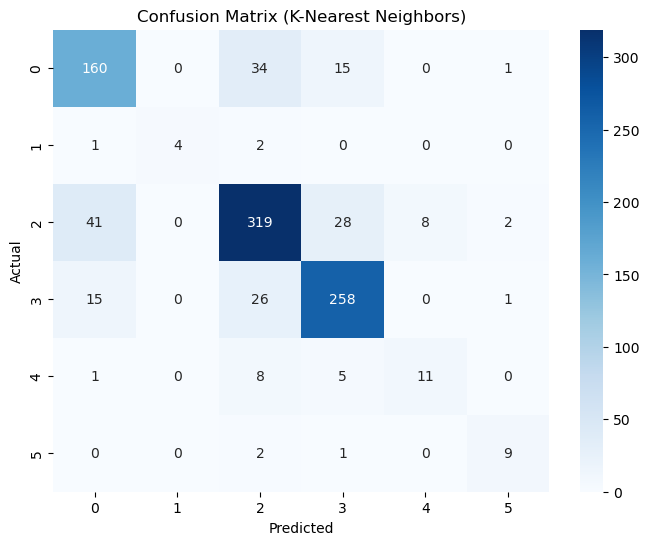

Results for K-Nearest Neighbors:
Accuracy: 0.7993697478991597
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       210
           1       1.00      0.57      0.73         7
           2       0.82      0.80      0.81       398
           3       0.84      0.86      0.85       300
           4       0.58      0.44      0.50        25
           5       0.69      0.75      0.72        12

    accuracy                           0.80       952
   macro avg       0.78      0.70      0.73       952
weighted avg       0.80      0.80      0.80       952

------------------------------


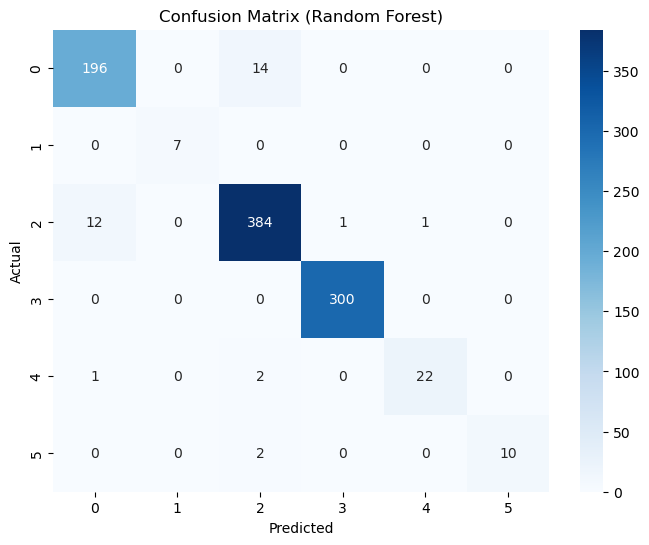

Results for Random Forest:
Accuracy: 0.9653361344537815
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       210
           1       1.00      1.00      1.00         7
           2       0.96      0.96      0.96       398
           3       1.00      1.00      1.00       300
           4       0.96      0.88      0.92        25
           5       1.00      0.83      0.91        12

    accuracy                           0.97       952
   macro avg       0.97      0.94      0.95       952
weighted avg       0.97      0.97      0.97       952

------------------------------


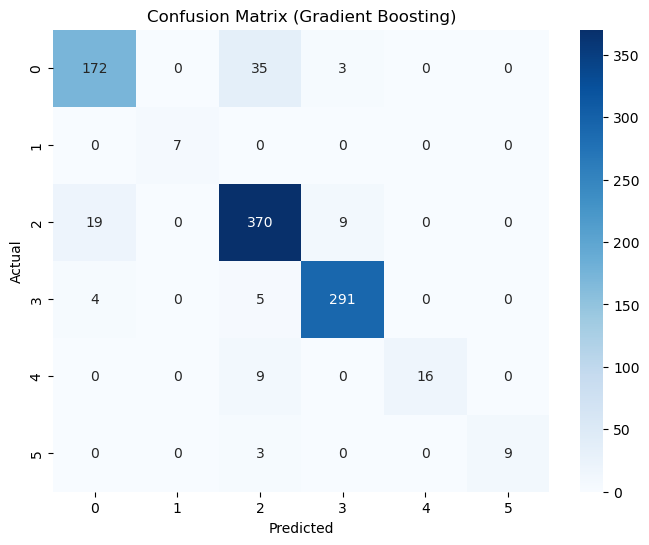

Results for Gradient Boosting:
Accuracy: 0.9086134453781513
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       210
           1       1.00      1.00      1.00         7
           2       0.88      0.93      0.90       398
           3       0.96      0.97      0.97       300
           4       1.00      0.64      0.78        25
           5       1.00      0.75      0.86        12

    accuracy                           0.91       952
   macro avg       0.95      0.85      0.89       952
weighted avg       0.91      0.91      0.91       952

------------------------------


In [99]:
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)  # Use selected features
    y_pred = model.predict(X_test_selected) # Use selected features
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print results
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{cr}")
    print("-" * 30)

This approach systematically compares multiple models.
The confusion matrix helps identify where models make mistakes (e.g., misclassification between classes).
Gradient Boosting and Random Forest often perform better on complex datasets due to their ensemble nature.


 # Selecting the Best Model

In [102]:
best_model_name = max(results, key=lambda k: results[k]["Accuracy"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['Accuracy']}")


Best Model: Random Forest with accuracy 0.9653361344537815


In [103]:
# Example pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handles missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', RandomForestClassifier())  # ML model
])

In [104]:
# Fit the pipeline with training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

# After training the model, we use it to make predictions on the unseen test data

In [106]:

y_pred=pipeline.predict(X_test_scaled)

# Evaluate the pipeline

In [108]:

accuracy_pipeline = accuracy_score(y_test, y_pred)
print(f"Accuracy of the pipeline: {accuracy_pipeline}")

Accuracy of the pipeline: 0.31512605042016806


# Initialize and train the model

In [110]:

model = RandomForestClassifier(random_state = 42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# Save the pipeline

In [112]:

joblib.dump(pipeline, 'Random_forest_pipeline.joblib')
print("Pipeline saved as 'Random_forest_pipeline.joblib'")

Pipeline saved as 'Random_forest_pipeline.joblib'


In [113]:
loaded_pipeline=joblib.load('Random_forest_pipeline.joblib')

# Generate synthetic unseen data with realistic ranges

In [115]:
import pandas as pd
import numpy as np

# Define number of samples
num_samples = 50


unseen_data = pd.DataFrame({
    'timestamp': np.round(np.random.uniform(500, 1000, num_samples), 1),
    'x': np.round(np.random.uniform(496000, 496500, num_samples), 4),
    'y': np.round(np.random.uniform(5406000, 5406500, num_samples), 4),
    'body_yaw': np.round(np.random.uniform(0, 360, num_samples), 1),
    'head_pitch': np.round(np.random.uniform(-10, 10, num_samples), 1),
    'head_yaw': np.round(np.random.uniform(0, 360, num_samples), 1),
    'other_x': np.round(np.random.uniform(496000, 496500, num_samples), 4),
    'other_y': np.round(np.random.uniform(5406000, 5406500, num_samples), 4)
})

# Create relative positions
unseen_data['relative_x'] = np.round(unseen_data['x'] - unseen_data['other_x'], 3)
unseen_data['relative_y'] = np.round(unseen_data['y'] - unseen_data['other_y'], 3)



# Save the dataset to CSV
unseen_data.to_csv('synthetic_unseen_data.csv', index=False)

# Preview the dataset
print("Generated Unseen Data Shape:", unseen_data.shape)
print(unseen_data.head())

Generated Unseen Data Shape: (50, 10)
   timestamp            x             y  body_yaw  head_pitch  head_yaw  \
0      527.4  496212.7066  5.406045e+06     308.7         9.1      42.4   
1      576.4  496334.3093  5.406289e+06     162.0        -1.4     147.2   
2      776.1  496308.4046  5.406337e+06     247.0        -8.0     277.6   
3      751.1  496188.3982  5.406427e+06     305.5         7.1      73.2   
4      928.4  496278.2964  5.406087e+06     110.9        10.0     260.8   

       other_x       other_y  relative_x  relative_y  
0  496104.6772  5.406437e+06     108.029    -392.414  
1  496210.2933  5.406052e+06     124.016     237.306  
2  496358.3487  5.406213e+06     -49.944     124.055  
3  496293.3980  5.406451e+06    -105.000     -23.777  
4  496348.9710  5.406408e+06     -70.675    -320.640  


In [116]:
unseen_data.shape

(50, 10)

In [117]:
unseen_data

,timestamp,x,y,body_yaw,head_pitch,head_yaw,other_x,other_y,relative_x,relative_y
0,527.4,496212.7066,5.406045e+06,308.7,9.1,42.4,496104.6772,5.406437e+06,108.029,-392.414
1,576.4,496334.3093,5.406289e+06,162.0,-1.4,147.2,496210.2933,5.406052e+06,124.016,237.306
2,776.1,496308.4046,5.406337e+06,247.0,-8.0,277.6,496358.3487,5.406213e+06,-49.944,124.055
3,751.1,496188.3982,5.406427e+06,305.5,7.1,73.2,496293.3980,5.406451e+06,-105.000,-23.777
4,928.4,496278.2964,5.406087e+06,110.9,10.0,260.8,496348.9710,5.406408e+06,-70.675,-320.640
5,595.7,496078.8331,5.406385e+06,34.8,0.9,64.5,496202.5175,5.406072e+06,-123.684,313.162
6,992.8,496311.7215,5.406210e+06,117.8,1.1,71.8,496161.0760,5.406338e+06,150.645,-127.969
7,789.4,496371.9537,5.406303e+06,316.3,-1.0,233.7,496357.8894,5.406004e+06,14.064,299.612
8,893.3,496145.2109,5.406312e+06,199.7,1.2,339.7,496194.5048,5.406215e+06,-49.294,97.580
9,970.7,496034.1625,5.406271e+06,182.6,2.1,141.5,496326.3022,5.406188e+06,-292.140,82.496


In [118]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   50 non-null     float64
 1   x           50 non-null     float64
 2   y           50 non-null     float64
 3   body_yaw    50 non-null     float64
 4   head_pitch  50 non-null     float64
 5   head_yaw    50 non-null     float64
 6   other_x     50 non-null     float64
 7   other_y     50 non-null     float64
 8   relative_x  50 non-null     float64
 9   relative_y  50 non-null     float64
dtypes: float64(10)
memory usage: 4.0 KB


In [119]:
X_test_unseen_scaled = scaler.fit_transform(unseen_data)

scaler = StandardScaler()

In [120]:
X_test_unseen_scaled=scaler.fit_transform(unseen_data)

# Making Predictions with a Saved Pipeline


In [121]:
predictions = loaded_pipeline.predict(X_test_unseen_scaled)
print(f"Predictions: {predictions}")

Predictions: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [122]:
unseen_data['Class'] = predictions

In [123]:
unseen_data

,timestamp,x,y,body_yaw,head_pitch,head_yaw,other_x,other_y,relative_x,relative_y,Class
0,527.4,496212.7066,5.406045e+06,308.7,9.1,42.4,496104.6772,5.406437e+06,108.029,-392.414,3
1,576.4,496334.3093,5.406289e+06,162.0,-1.4,147.2,496210.2933,5.406052e+06,124.016,237.306,3
2,776.1,496308.4046,5.406337e+06,247.0,-8.0,277.6,496358.3487,5.406213e+06,-49.944,124.055,3
3,751.1,496188.3982,5.406427e+06,305.5,7.1,73.2,496293.3980,5.406451e+06,-105.000,-23.777,3
4,928.4,496278.2964,5.406087e+06,110.9,10.0,260.8,496348.9710,5.406408e+06,-70.675,-320.640,3
5,595.7,496078.8331,5.406385e+06,34.8,0.9,64.5,496202.5175,5.406072e+06,-123.684,313.162,3
6,992.8,496311.7215,5.406210e+06,117.8,1.1,71.8,496161.0760,5.406338e+06,150.645,-127.969,3
7,789.4,496371.9537,5.406303e+06,316.3,-1.0,233.7,496357.8894,5.406004e+06,14.064,299.612,3
8,893.3,496145.2109,5.406312e+06,199.7,1.2,339.7,496194.5048,5.406215e+06,-49.294,97.580,3
9,970.7,496034.1625,5.406271e+06,182.6,2.1,141.5,496326.3022,5.406188e+06,-292.140,82.496,3


# Saving Unseen Data to CSV

In [197]:
unseen_data.to_csv('Unseen_pedastrain _track.csv',index= False)